In [1]:
import sys

%load_ext autoreload
%autoreload 1
%aimport pygenesig.validation
%aimport pygenesig.gini
%aimport pygenesig.bioqc
%aimport pygenesig.tools
%aimport pygenesig.perfmeasures
%matplotlib inline

from pygenesig.validation import * 
from pygenesig.gini import * 
from pygenesig.bioqc import * 
from pygenesig.tools import * 
import pygenesig.perfmeasures as pm
import numpy as np
import pandas as pd
import sklearn.metrics as skm 
import os.path
import dask
from distributed import Client, progress
# import dask.async
import dask.diagnostics

import seaborn as sns
sns.set_style("ticks", {"axes.grid" : True})
from pylab import * 

In [2]:
roche_hq = load_gmt("../gmt/exp.fantom5.primary_cells_HQ.roche.symbol.gmt")
hq_fine = load_gmt("../results/primary_fine.gmt")
hq_coarse = load_gmt("../results/primary_coarse.gmt")
tissue = load_gmt("../results/tissue.gmt")
tissue_gtex = load_gmt("/home/sturm/data/pygenesig-data/results/gtex_v6_solid_gini_0.8_3/signatures.gmt")

In [3]:
def jaccard_mat(sigs1, sigs2):
    for name1, genes1 in sigs1.items():
        for name2, genes2 in sigs2.items():
            yield (name1, name2, jaccard_ind(set(genes1), set(genes2)))

## tissue against gtex

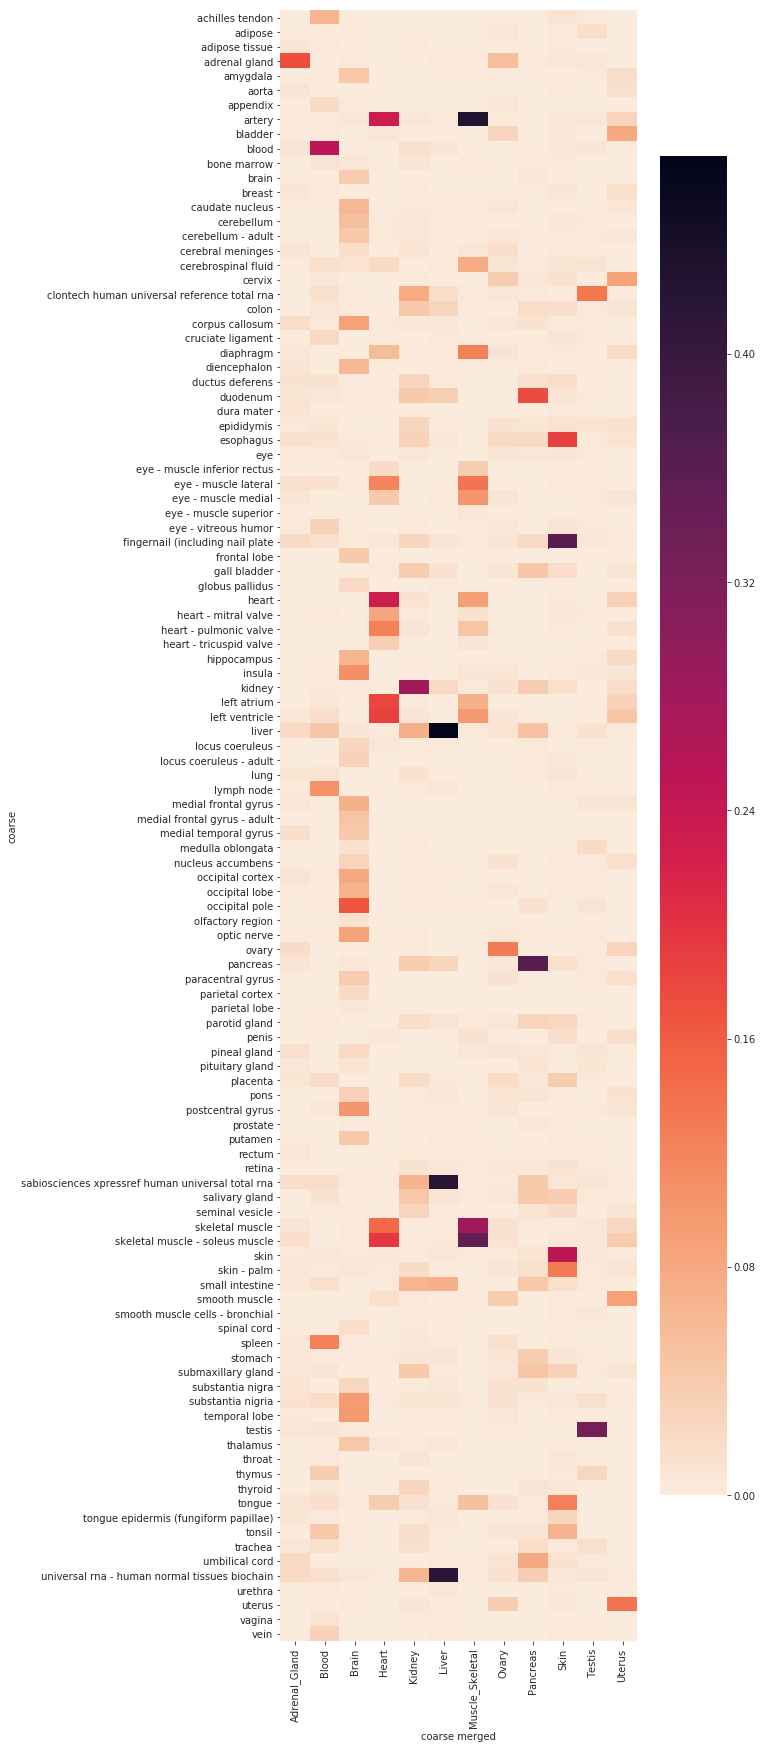

In [4]:
fig, ax = subplots(figsize=(8, 30))
df = pd.DataFrame(
    jaccard_mat(tissue, tissue_gtex),
    columns=("coarse", "coarse merged", "jaccard"),
)
sns.heatmap(
    df.pivot(*df.columns), ax=ax, cmap=sns.cm.rocket_r,
)

## Roche HQ against coarse

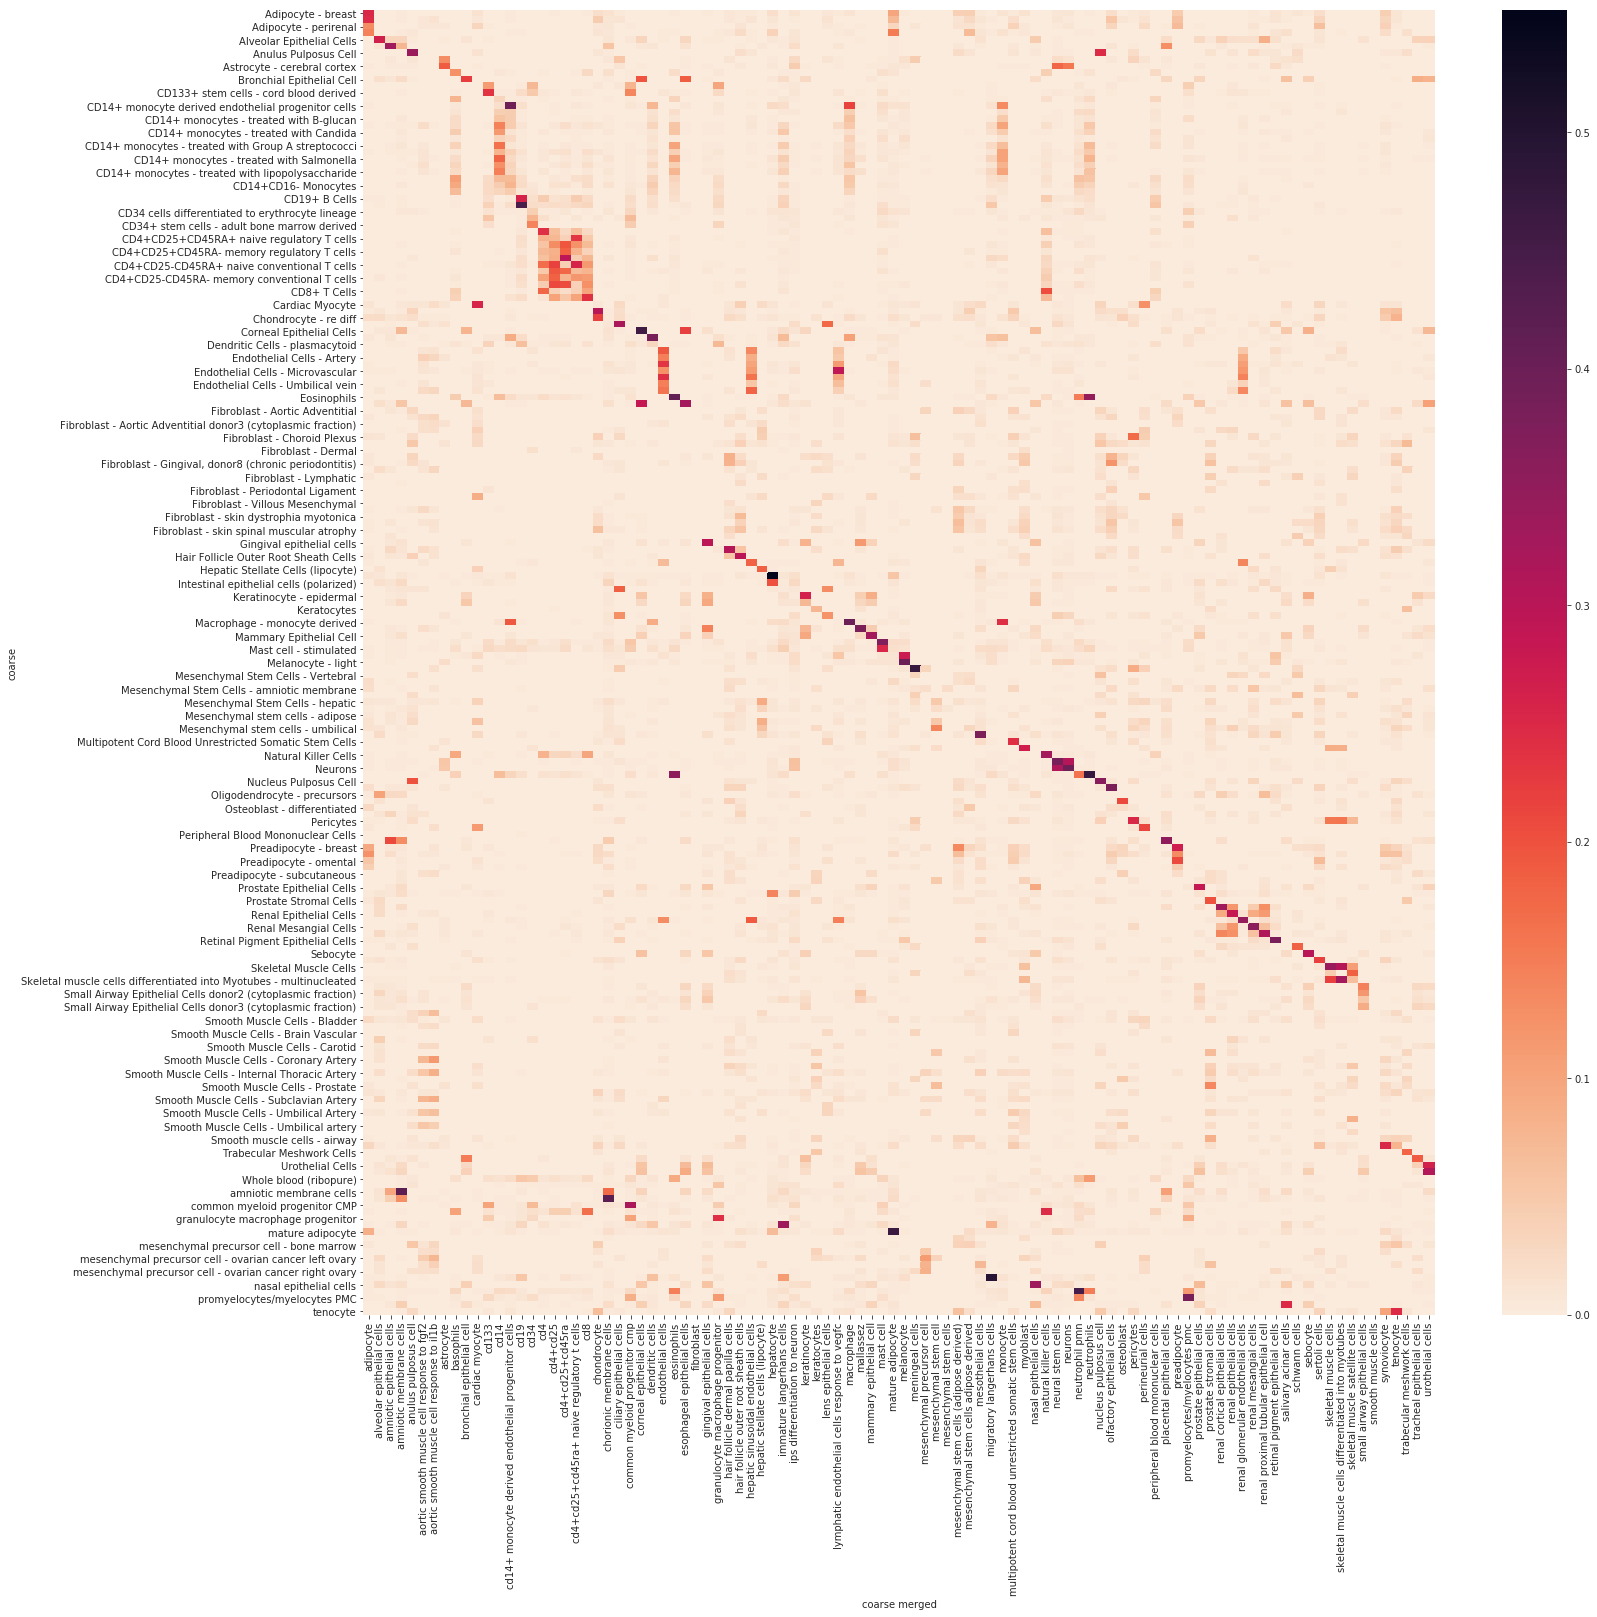

In [5]:
fig, ax = subplots(figsize=(24, 24))
df = pd.DataFrame(
    jaccard_mat(roche_hq, hq_coarse),
    columns=("coarse", "coarse merged", "jaccard"),
)
sns.heatmap(
    df.pivot(*df.columns), ax=ax, cmap=sns.cm.rocket_r,
)

## Roche HQ against fine

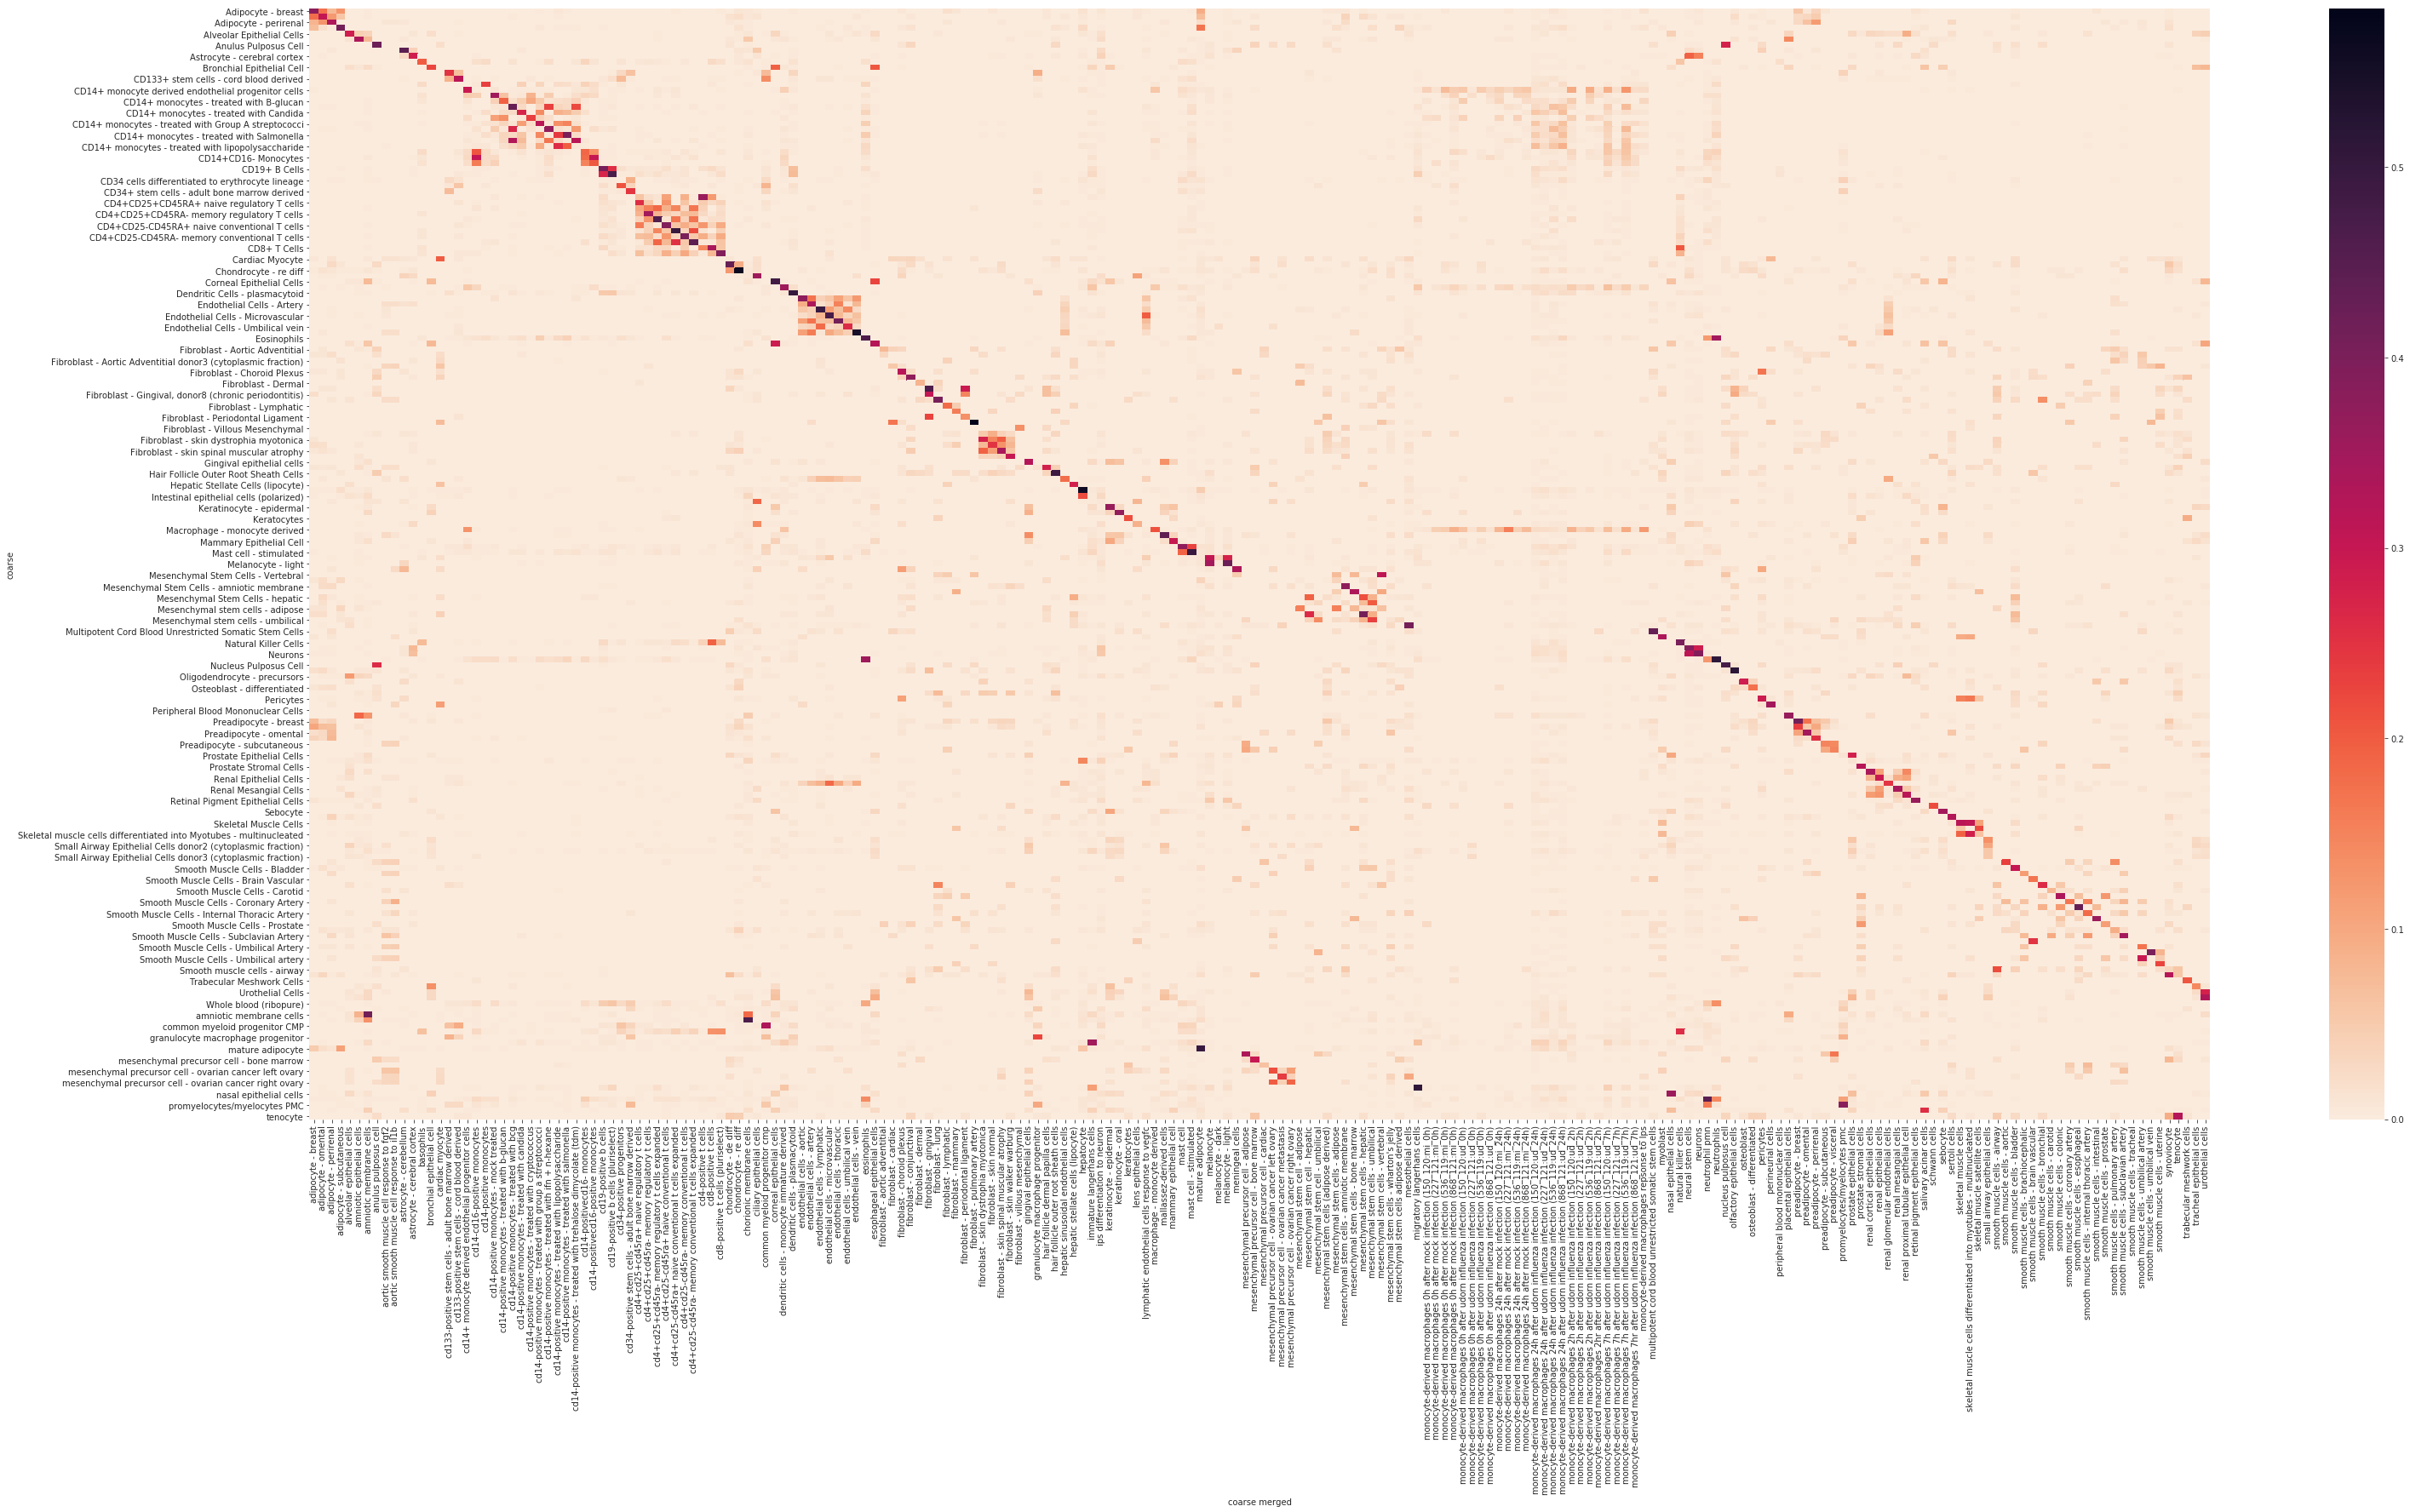

In [7]:
fig, ax = subplots(figsize=(50, 24))
df = pd.DataFrame(
    jaccard_mat(roche_hq, hq_fine),
    columns=("coarse", "coarse merged", "jaccard"),
)
sns.heatmap(
    df.pivot(*df.columns), ax=ax, cmap=sns.cm.rocket_r,
)